In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from pyiron_atomistics import Project
from pyiron_electrochemistry.atomistic.geometry.water import WaterGeometryCalculator
import ase.units as units
import pandas

In [2]:
pr = Project("tip3p_water")

In [3]:
density = 1.0e-24  # g/A^3
n_mols = 27
mol_mass_water = 18.015 # g/mol

# Determining the supercell size size
mass = mol_mass_water * n_mols / units.mol  # g
vol_h2o = mass / density # in A^3
a = vol_h2o ** (1./3.) # A

# Constructing the unitcell
n = int(round(n_mols ** (1. / 3.)))

dx = 0.7
r_O = [0, 0, 0]
r_H1 = [dx, dx, 0]
r_H2 = [-dx, dx, 0]
unit_cell = (a / n) * np.eye(3)
water = pr.create_atoms(elements=['H', 'H', 'O'],
                        positions=[r_H1, r_H2, r_O],
                        cell=unit_cell, pbc=True)
water.set_repeat([n, n, n])
water.plot3d()

NGLWidget()

In [4]:
water_potential = pandas.DataFrame({
    'Name': ['H2O_tip3p'],
    'Filename': [[]],
    'Model': ["TIP3P"],
    'Species': [['H', 'O']],
    'Config': [['# @potential_species H_O ### species in potential\n', '# W.L. Jorgensen et.al., The Journal of Chemical Physics 79, 926 (1983); https://doi.org/10.1063/1.445869\n', '#\n', '\n', 'units real\n', 'dimension 3\n', 'atom_style full\n', '\n', '# create groups ###\n', 'group O type 2\n', 'group H type 1\n', '\n', '## set charges - beside manually ###\n', 'set group O charge -0.830\n', 'set group H charge 0.415\n', '\n', '### TIP3P Potential Parameters ###\n', 'pair_style lj/cut/coul/long 10.0\n', 'pair_coeff * * 0.0 0.0 \n', 'pair_coeff 2 2 0.102 3.188 \n', 'bond_style harmonic\n', 'bond_coeff 1 450 0.9572\n', 'angle_style harmonic\n', 'angle_coeff 1 55 104.52\n', 'kspace_style pppm 1.0e-5\n', '\n']]
})

In [5]:
job_name = "water_slow"
ham = pr.create_job("Lammps", job_name)
ham.structure = water
ham.potential = water_potential

/cmmc/u/chandu/programs/pyiron_mpie/pyiron_base/pyiron_base/generic/parameters.py:282: UserWarning: The input in GenericParameters changed, while the state of the job was already finished.
  warnings.warn(
/cmmc/u/chandu/programs/pyiron_mpie/pyiron_atomistics/pyiron_atomistics/lammps/base.py:209: UserWarning: WARNING: Non-'metal' units are not fully supported. Your calculation should run OK, but results may not be saved in pyiron units.
  warnings.warn(


In [6]:
ham.calc_md(temperature=300,
            n_ionic_steps=1e4,
            time_step=0.01)
ham.run()

2021-10-29 20:14:00,635 - pyiron_log - WARNING - The job water_slow is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2021-10-29 20:14:00,635 - pyiron_log - WARNING - The job water_slow is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'


In [7]:
wg = WaterGeometryCalculator(ham)

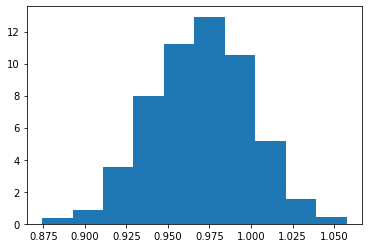

In [8]:
_ = plt.hist(wg.intra_oh_distances.flatten(), density=True)